In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')

# Seasonality

##  Additive Seasonality

In [3]:
m = NeuralProphet()
metrics = m.fit(df)
metrics

Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,SmoothL1Loss,MAE,RegLoss
0,0.553201,0.779545,0.0
1,0.223689,0.445170,0.0
2,0.188251,0.396615,0.0
3,0.182897,0.394303,0.0
4,0.180086,0.386973,0.0
5,0.185406,0.393415,0.0
6,0.191950,0.404067,0.0
7,0.180217,0.388476,0.0
8,0.173283,0.375348,0.0
9,0.172738,0.378507,0.0


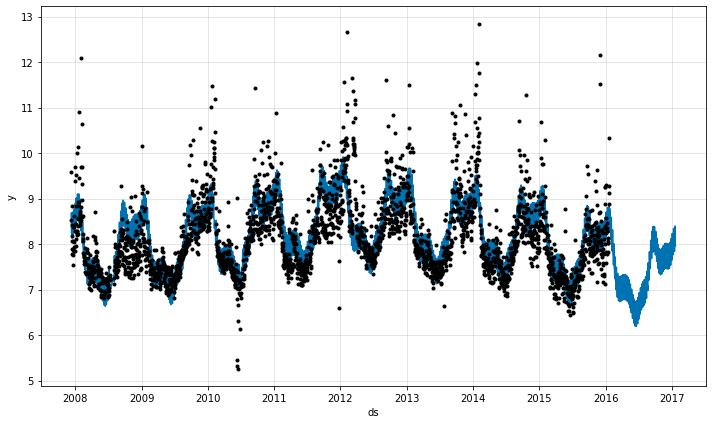

In [4]:
future = m.compose_prediction_df(df, future_periods=365, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

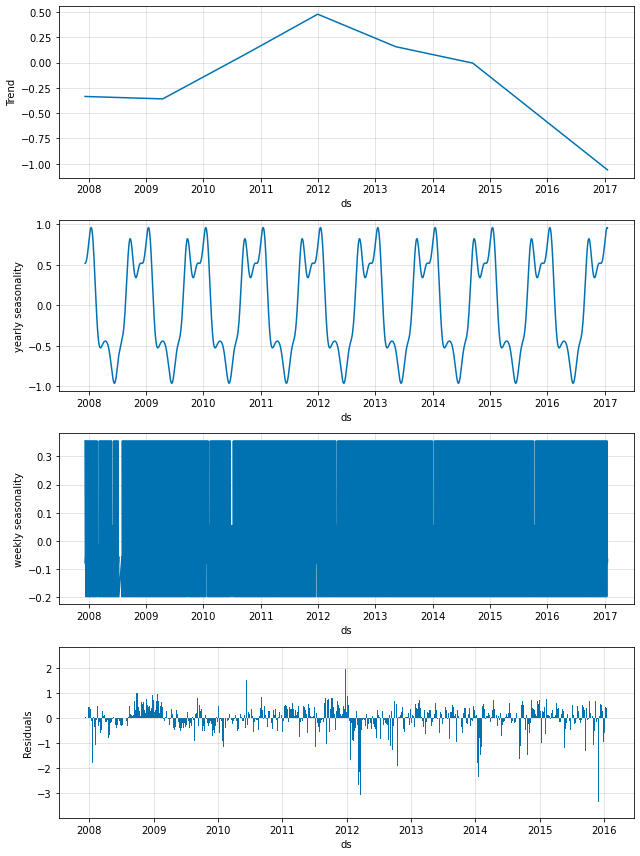

In [5]:
fig_comp = m.plot_components(forecast)

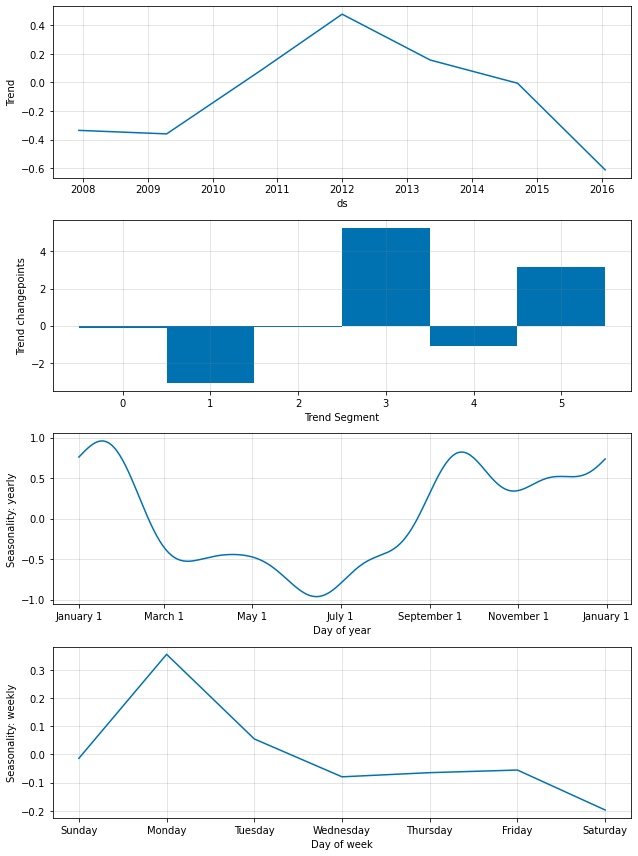

In [6]:
fig_param = m.plot_parameters()

##  Multiplicative Seasonality
Clearly, additive seasonality is the better fit for this data.

In [7]:
m = NeuralProphet(
#     n_changepoints=0, 
    seasonality_mode='multiplicative',
)
metrics = m.fit(df)

Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


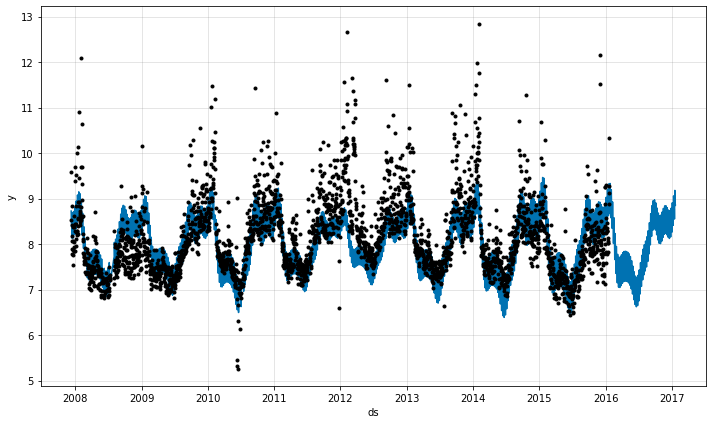

In [8]:
future = m.compose_prediction_df(df, future_periods=365, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

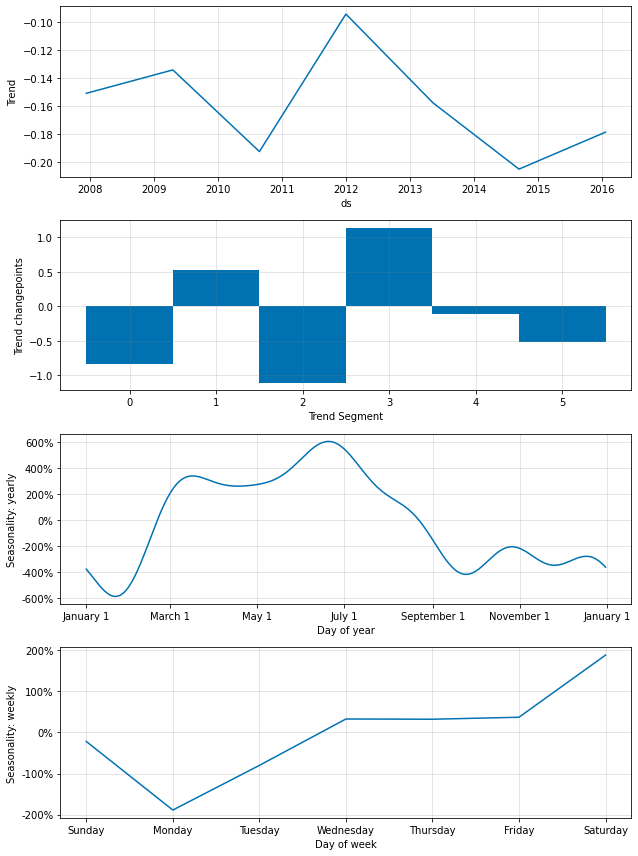

In [9]:
fig_param = m.plot_parameters()

##  Underfit Additive Seasonality

In [10]:
m = NeuralProphet(
    yearly_seasonality=2,
    weekly_seasonality=1,
    daily_seasonality=False,
)
metrics = m.fit(df)

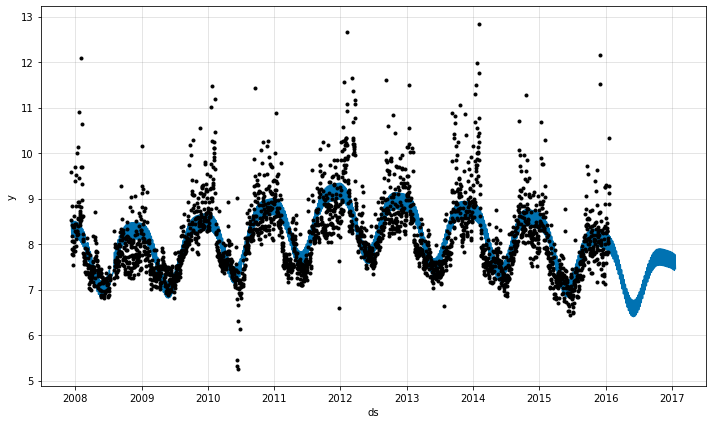

In [11]:
future = m.compose_prediction_df(df, future_periods=365, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

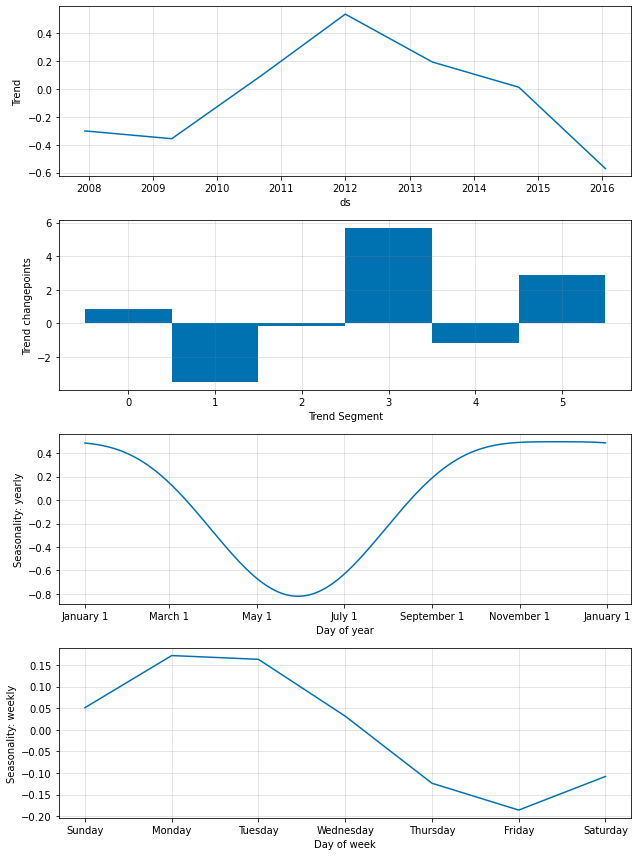

In [12]:
fig_param = m.plot_parameters()

##  Overfit Additive Seasonality

In [13]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
)
metrics = m.fit(df)

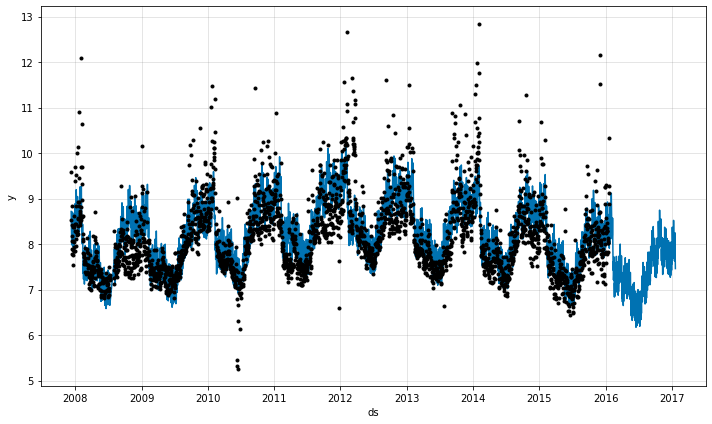

In [14]:
future = m.compose_prediction_df(df, future_periods=365, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

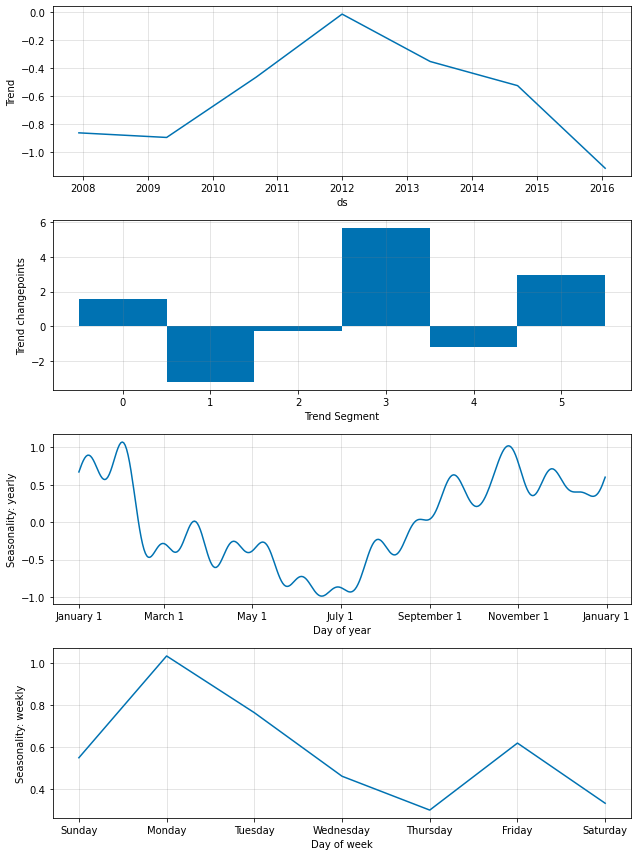

In [15]:
fig_param = m.plot_parameters()

In [16]:
print(sum(abs(m.model.season_params["yearly"].data.numpy())))
print(sum(abs(m.model.season_params["weekly"].data.numpy())))

# print(m.model.season_params["yearly"].data)
# print(m.model.season_params["weekly"].data)

3.1288591027259827
4.965534953400493


##  Regularized Additive Seasonality

In [25]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_reg=1,
)
metrics = m.fit(df)

NOTICE: A Regularization strength for the seasonal Fourier Terms was set.Please note that this feature is experimental.


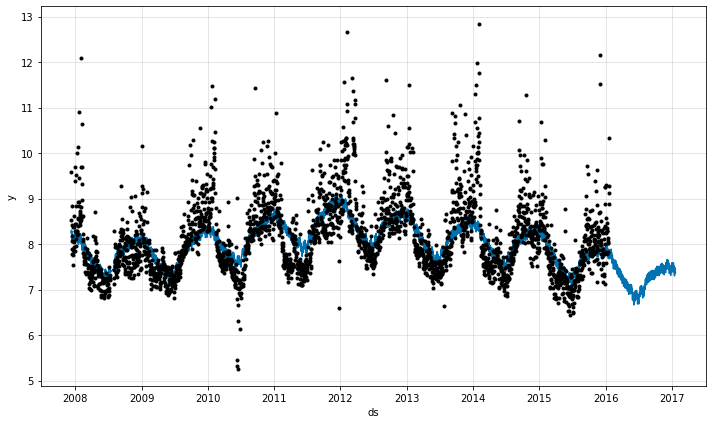

In [26]:
future = m.compose_prediction_df(df, future_periods=365, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

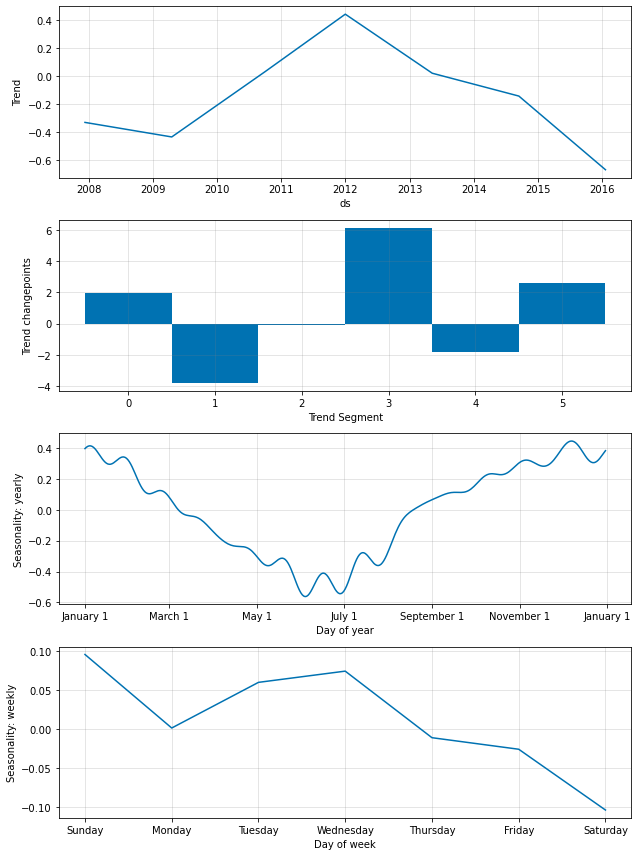

In [27]:
fig_param = m.plot_parameters()

In [28]:
print(sum(abs(m.model.season_params["yearly"].data.numpy())))
print(sum(abs(m.model.season_params["weekly"].data.numpy())))

# print(m.model.season_params["yearly"].data)
# print(m.model.season_params["weekly"].data)

1.0347976591438055
0.2679931693710387
